<a href="https://colab.research.google.com/github/abdolrahman3791/MyNeuralNetworkProjects/blob/main/Autoencoder_CIFAR10_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, Conv2DTranspose, Dense, BatchNormalization, Dropout, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [57]:
(xt, yt), (xs, ys) = cifar10.load_data()

In [58]:
xt = xt.astype('float32')/255
xs = xs.astype('float32')/255

In [37]:
encoder = Sequential([
Conv2D(4, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
BatchNormalization(),
Conv2D(4, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Conv2D(8, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(8, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Conv2D(16, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(16, (3, 3), activation='relu', padding='same'),
BatchNormalization()
])

decoder = Sequential([
Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same', input_shape=(8, 8, 16)),
BatchNormalization(),
Conv2DTranspose (64, (3, 3), strides=2, activation='relu', padding='same'),
BatchNormalization(),
Conv2DTranspose (64, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2DTranspose (32, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(32, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2DTranspose (3, (3, 3), activation='relu', padding='same'),
BatchNormalization()
])

In [42]:
autoencoder = Sequential([
encoder,
decoder
])
autoencoder.compile(optimizer='adam', loss='mse')

In [44]:
autoencoder.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 8, 8, 16)       │         4,852 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 32, 32, 3)      │       112,751 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,603 (459.39 KB)

 Trainable params: 116,973 (456.93 KB)

 Non-trainable params: 630 (2.46 KB)

In [45]:
autoencoder.fit(xt, xt, epochs=100, batch_size=512)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 219ms/step - loss: 0.9342
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - loss: 0.5907
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.4222
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.2928
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.2025
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.1406
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0958
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0648
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0427
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0300
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0206
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0135
Epoch 13/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0112
Epoch 14/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0082
Epoch 15/100
98/98 ━━━━━━━━━━━━━━━━━━

In [46]:
autoencoder.evaluate(xs, xs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0027


0.00265677971765399

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


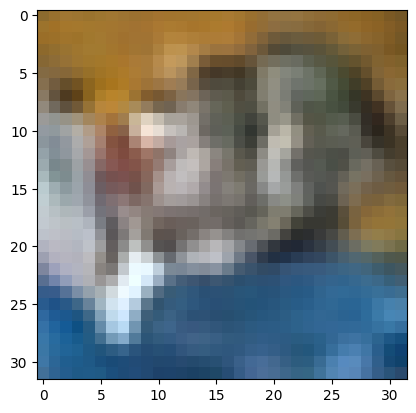

In [47]:

index = 0
p = autoencoder.predict(xs)
plt.imshow(p[index])

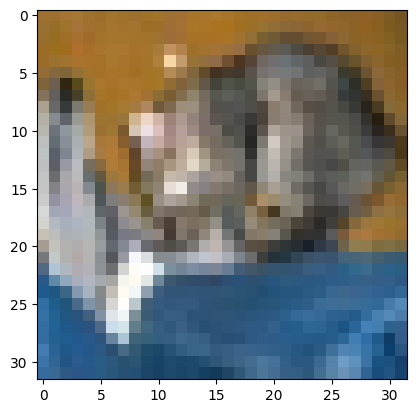

In [48]:
plt.imshow(xs[index])

In [59]:
xt = encoder.predict(xt)
xs = encoder.predict(xs)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


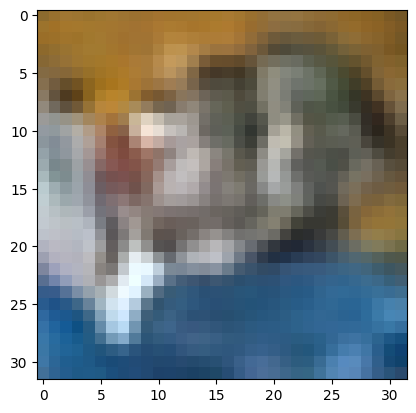

In [61]:
pd = decoder.predict(xs)
plt.imshow(pd[index])

In [70]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 16)),
BatchNormalization(),
Conv2D(32, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(64, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Conv2D(128, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(128, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Conv2D(256, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(256, (3, 3), activation='relu', padding='same'),
BatchNormalization(),
Flatten(),
Dense(256, activation='relu'),
Dropout(0.5),
BatchNormalization(),
Dense(128, activation='relu'),
Dropout(0.5),
BatchNormalization(),
Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(xt, yt, epochs=200, batch_size=1600, validation_split=0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.7820 - val_loss: 1.5358
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9961 - loss: 0.0152 - val_accuracy: 0.7841 - val_loss: 1.5247
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 0.7864 - val_loss: 1.5729
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.7868 - val_loss: 1.5996
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.7878 - val_loss: 1.6206
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.7889 - val_loss: 1.6437
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.7884 - val_loss: 1.6578
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 8.0911e-04 - val_accura

In [ ]:
model.evaluate(xs, ys)